<a href="https://colab.research.google.com/github/jumbokh/csu1101-ML-Class/blob/main/notebooks/update_Cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Keras] 使用 CNN 建立 Cifar-10 的分類器 (實戰篇)
#### https://clay-atlas.com/blog/2019/10/03/python-chinese-tutorial-keras-cnn-cifar10/

In [2]:
!pip install keras.utils
!pip install graphViz
!pip install pydot==1.2.4

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=b63fe0b16f7861fe53f06bee0964be7b04a05017956a6d3ac0e66a0cffe2b9e5
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils
     |████████████████████████████████| 132 kB 5.2 MB/s 
  Created wheel for pydot: filename=pydot-1.2.4-py3-none-any.whl size=18956 sha256=1eff49e256a5e3a2fc214fb96c2148ea91a29b164d9852a354fba5fac98897b7
  Stored in directory: /root/.cache/pip/wheels/05/f6/2d/6dd07d0bd13d66d5b4d74e966cb5da86a59fedd6b39adc4a4d
Successfully built pydot
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -fs /content/gdrive/My\ Drive /app
!tar -xzvf /app/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# 檢查是否安裝成功
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/app/My Drive': Input/output error
cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential, load_model
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [5]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
x_train = X_train.astype('float32')/255
x_test = X_test.astype('float32')/255
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         1

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
782/782 [==============================] - 52s 28ms/step - loss: 1.5097 - accuracy: 0.4467
Epoch 2/10
782/782 [==============================] - 21s 27ms/step - loss: 0.9756 - accuracy: 0.6516
Epoch 3/10
782/782 [==============================] - 21s 27ms/step - loss: 0.7579 - accuracy: 0.7329
Epoch 4/10
782/782 [==============================] - 21s 27ms/step - loss: 0.6207 - accuracy: 0.7828
Epoch 5/10
782/782 [==============================] - 21s 27ms/step - loss: 0.5172 - accuracy: 0.8178
Epoch 6/10
782/782 [==============================] - 21s 27ms/step - loss: 0.4237 - accuracy: 0.8525
Epoch 7/10
782/782 [==============================] - 21s 27ms/step - loss: 0.3461 - accuracy: 0.8757
Epoch 8/10
782/782 [==============================] - 21s 27ms/step - loss: 0.2925 - accuracy: 0.8959
Epoch 9/10
782/782 [==============================] - 21s 27ms/step - loss: 0.2442 - accuracy: 0.9133
Epoch 10/10
782/782 [==============================] - 21s 27ms/step - loss: 0.213

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test:')
print('Loss:', loss)
print('Accuracy:', accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.8875 - accuracy: 0.7821
Test:
Loss: 0.8875325918197632
Accuracy: 0.7821000218391418


In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

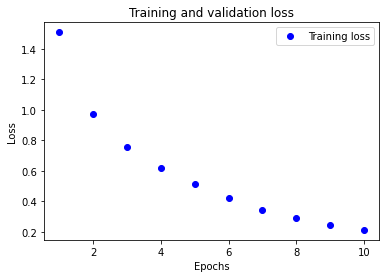

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
print(accuracy)

0.7821000218391418


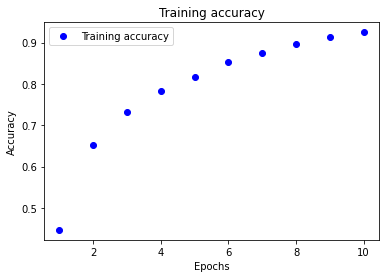

In [19]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()